In [5]:
import pandas as pd

df = pd.read_csv('trends_final.csv')

print(f"Total rows: {len(df)}")
print(f"Unique keywords: {df['keyword'].nunique()}")
print(f"Unique dates: {df['date'].nunique()}")

# Check for duplicates first
dupes = df.duplicated(subset=['keyword', 'date'])
print(f"\nDuplicate (keyword, date) pairs: {dupes.sum()}")

# Drop duplicates keeping first occurrence
df = df.drop_duplicates(subset=['keyword', 'date'], keep='first')
print(f"After dedup: {len(df)} rows")

# Now pivot
df_wide = df.pivot(index='date', columns='keyword', values='interest')
print(f"\nWide format shape: {df_wide.shape}")
print(f"Expected rows (~520 weeks): {df_wide.shape[0]}")

# Check missing data per keyword
missing = df_wide.isnull().sum()
missing_pct = (missing / len(df_wide) * 100).round(1)
missing_summary = pd.DataFrame({'missing_count': missing, 'missing_pct': missing_pct})
missing_summary = missing_summary[missing_summary['missing_count'] > 0].sort_values('missing_pct', ascending=False)

print(f"\nKeywords with missing data: {len(missing_summary)}")
print(missing_summary.head(20))

Total rows: 194400
Unique keywords: 1620
Unique dates: 120

Duplicate (keyword, date) pairs: 0
After dedup: 194400 rows

Wide format shape: (120, 1620)
Expected rows (~520 weeks): 120

Keywords with missing data: 0
Empty DataFrame
Columns: [missing_count, missing_pct]
Index: []


In [10]:
df_wide

keyword,5g,5g network,5g spectrum,5g stock,5g technology,6g,able,accident,activision blizzard,ad revenue,...,xlk etf,yield curve,yield curve inversion,yield inversion,youtube,youtube ads,zillow,zinc,zinc price,zyn pouches
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,4.761905,0.000000,0.0,0.0,0.0,0.000000,47.619048,176.923077,0.0,0.0,...,0.0,0.0,0.0,0.0,4600.000000,0.000000,305.555556,23.809524,0.000000,0.000000
2016-02-01,5.555556,0.000000,0.0,0.0,0.0,0.000000,66.666667,218.181818,0.0,0.0,...,0.0,0.0,0.0,0.0,4750.000000,0.000000,400.000000,33.333333,0.000000,0.000000
2016-03-01,7.692308,0.000000,0.0,0.0,0.0,0.000000,84.615385,287.500000,0.0,0.0,...,0.0,0.0,0.0,0.0,4700.000000,0.000000,563.636364,46.153846,0.000000,0.000000
2016-04-01,9.090909,0.000000,0.0,0.0,0.0,0.000000,100.000000,385.714286,0.0,0.0,...,0.0,0.0,0.0,0.0,9400.000000,0.000000,660.000000,45.454545,0.000000,0.000000
2016-05-01,10.000000,0.000000,0.0,0.0,0.0,0.000000,110.000000,433.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,9700.000000,0.000000,755.555556,50.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-01,50.000000,0.000000,0.0,0.0,0.0,4.166667,100.000000,266.666667,0.0,0.0,...,0.0,0.0,0.0,0.0,2400.000000,4.166667,342.857143,33.333333,0.000000,4.166667
2025-09-01,45.454545,0.000000,0.0,0.0,0.0,4.545455,136.363636,257.142857,0.0,0.0,...,0.0,0.0,0.0,0.0,2566.666667,4.545455,331.578947,40.909091,0.000000,4.545455
2025-10-01,32.142857,0.000000,0.0,0.0,0.0,0.000000,117.857143,205.882353,0.0,0.0,...,0.0,0.0,0.0,0.0,2500.000000,3.571429,266.666667,32.142857,0.000000,3.571429


In [11]:
# Drop words that have data = 0 for different thresholds
# Check how many zeros per keyword
zero_pct = (df_wide == 0).sum() / len(df_wide)

print("Zero percentage stats:")
print(zero_pct.describe())

# See how many survive at different zero thresholds
for threshold in [0.50, 0.60, 0.70, 0.80, 0.90]:
    surviving = (zero_pct < threshold).sum()
    print(f"Drop if >{threshold:.0%} zeros: {surviving} keywords survive ({surviving/len(zero_pct)*100:.1f}%)")

Zero percentage stats:
count    1620.000000
mean        0.620823
std         0.456093
min         0.000000
25%         0.000000
50%         0.966667
75%         1.000000
max         1.000000
dtype: float64
Drop if >50% zeros: 599 keywords survive (37.0%)
Drop if >60% zeros: 619 keywords survive (38.2%)
Drop if >70% zeros: 632 keywords survive (39.0%)
Drop if >80% zeros: 668 keywords survive (41.2%)
Drop if >90% zeros: 719 keywords survive (44.4%)


## Let's keep 70% as it is pretty standard

In [13]:
# Apply 70% zero filter
zero_pct = (df_wide == 0).sum() / len(df_wide)
df_filtered = df_wide.loc[:, zero_pct < 0.70]

print(f"Keywords remaining: {len(df_filtered.columns)}")

Keywords remaining: 632


## Chose to drop Category 1 words because they were not finance related enough and had very large means over time

In [21]:
# Check which of your top offenders are LM words
lm_words = set(pd.read_csv('lm_dict_survivors.csv')['keyword'])
top_offenders = keyword_means.sort_values(ascending=False).head(50).index.tolist()
lm_offenders = [w for w in top_offenders if w in lm_words]
print(lm_offenders)

['best', 'good', 'bad', 'great', 'happy', 'easy', 'cut', 'may', 'force', 'lost', 'questions', 'loss', 'break', 'dream', 'bridge', 'lose', 'miss', 'win', 'unemployment', 'popular', 'problems', 'accident']


In [25]:
# Load LM words
lm_words = set(pd.read_csv('lm_dict_survivors.csv')['keyword'])

# See how many of your 632 survivors are LM words
lm_in_filtered = [w for w in df_filtered.columns if w in lm_words]
non_lm_in_filtered = [w for w in df_filtered.columns if w not in lm_words]

print(f"LM words in filtered dataset: {len(lm_in_filtered)}")
print(f"Non-LM words in filtered dataset: {len(non_lm_in_filtered)}")

# Drop LM words
df_clean = df_filtered[non_lm_in_filtered]
print(f"\nShape after dropping LM words: {df_clean.shape}")

# Check new mean distribution
keyword_means_clean = df_clean.mean()
print(keyword_means_clean.describe())
print("\nTop 10 highest mean keywords:")
print(keyword_means_clean.sort_values(ascending=False).head(10))

df_clean

LM words in filtered dataset: 174
Non-LM words in filtered dataset: 458

Shape after dropping LM words: (120, 458)
count     458.000000
mean       67.912171
std       242.697561
min         1.327045
25%         5.682662
50%        10.922066
75%        33.898323
max      3876.722222
dtype: float64

Top 10 highest mean keywords:
keyword
youtube        3876.722222
movies         1723.460847
oil            1077.271613
restaurants    1045.081544
insurance      1038.870080
hotels          893.863820
home depot      877.463052
netflix         874.804207
airlines        822.949258
gold            783.167305
dtype: float64


keyword,5g,advertising,aerospace,affordable housing,ai stock,air cargo,air freight,air traffic,airlines,airlines stock,...,wind energy,wind power,wireless,wireless plans,wireless service,xle,youtube,youtube ads,zillow,zinc
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,4.761905,42.857143,14.285714,11.111111,0.000000,0.000000,0.000000,4.761905,770.000000,0.000000,...,4.761905,4.347826,365.000000,7.692308,14.285714,4.761905,4600.000000,0.000000,305.555556,23.809524
2016-02-01,5.555556,61.111111,16.666667,12.500000,0.000000,0.000000,0.000000,5.555556,887.500000,0.000000,...,5.555556,5.882353,429.411765,9.090909,11.111111,5.555556,4750.000000,0.000000,400.000000,33.333333
2016-03-01,7.692308,76.923077,23.076923,16.666667,0.000000,0.000000,0.000000,7.692308,1233.333333,0.000000,...,7.692308,7.142857,591.666667,12.500000,23.076923,7.692308,4700.000000,0.000000,563.636364,46.153846
2016-04-01,9.090909,90.909091,27.272727,20.000000,0.000000,9.090909,0.000000,9.090909,1440.000000,0.000000,...,9.090909,9.090909,618.181818,14.285714,27.272727,9.090909,9400.000000,0.000000,660.000000,45.454545
2016-05-01,10.000000,90.000000,30.000000,20.000000,0.000000,10.000000,0.000000,10.000000,1600.000000,0.000000,...,10.000000,9.090909,700.000000,14.285714,40.000000,10.000000,9700.000000,0.000000,755.555556,50.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-01,50.000000,33.333333,20.833333,9.090909,37.500000,4.166667,4.166667,4.166667,545.454545,4.166667,...,4.166667,4.000000,200.000000,0.000000,8.333333,12.500000,2400.000000,4.166667,342.857143,33.333333
2025-09-01,45.454545,40.909091,22.727273,10.000000,36.363636,4.545455,4.545455,4.545455,540.000000,4.545455,...,4.545455,4.545455,200.000000,0.000000,9.090909,9.090909,2566.666667,4.545455,331.578947,40.909091
2025-10-01,32.142857,32.142857,17.857143,7.692308,28.571429,3.571429,3.571429,14.285714,392.307692,3.571429,...,3.571429,3.571429,148.148148,0.000000,7.142857,10.714286,2500.000000,3.571429,266.666667,32.142857


## We then further filter by Mean

In [27]:
# Further filter by mean

# Now check mean distribution on survivors
keyword_means = df_clean.mean()
print(keyword_means.describe())

for threshold in [1, 2, 5, 10, 15, 20]:
    surviving = (keyword_means >= threshold).sum()
    print(f"Mean > {threshold:>2}: {surviving} keywords")

count     458.000000
mean       67.912171
std       242.697561
min         1.327045
25%         5.682662
50%        10.922066
75%        33.898323
max      3876.722222
dtype: float64
Mean >  1: 458 keywords
Mean >  2: 449 keywords
Mean >  5: 378 keywords
Mean > 10: 244 keywords
Mean > 15: 190 keywords
Mean > 20: 158 keywords


In [28]:
print(keyword_means_clean.sort_values(ascending=False).head(20))


keyword
youtube            3876.722222
movies             1723.460847
oil                1077.271613
restaurants        1045.081544
insurance          1038.870080
hotels              893.863820
home depot          877.463052
netflix             874.804207
airlines            822.949258
gold                783.167305
disney+             755.458592
credit card         556.611111
wells fargo         528.870263
glass               486.973542
silver              481.065767
benefits            479.470186
zillow              470.153018
paper               448.063133
real estate         386.633672
bank of america     370.619715
dtype: float64


## Looking at the top terms, I decided to get rid of some of them because their numbers were very high and they weren't exactly related to finance

In [29]:
drop_words = [
    "youtube", "movies", "restaurants", "hotels", "glass", "paper",
    "netflix", "disney+", "home depot", "wells fargo", "zillow", 
    "bank of america"
]

df_clean = df_clean.drop(columns=[w for w in drop_words if w in df_clean.columns])
print(f"After manual drops: {df_clean.shape}")
print(keyword_means_clean.drop(drop_words, errors='ignore').sort_values(ascending=False).head(20))

After manual drops: (120, 446)
keyword
oil             1077.271613
insurance       1038.870080
airlines         822.949258
gold             783.167305
credit card      556.611111
silver           481.065767
benefits         479.470186
real estate      386.633672
wireless         354.649070
steel            320.752611
software         296.927950
spotify          271.369894
construction     258.093318
tiktok           247.013736
streaming        243.365221
hardware         242.475393
savings          191.647558
banks            185.458029
dow jones        183.054564
gaming           180.222799
dtype: float64


## After dropping we can see its a bit better, less company names and top words are more finance-related

## We filter by mean

In [30]:
keyword_means_clean = df_clean.mean()
for threshold in [5, 10, 15, 20, 25, 30]:
    surviving = (keyword_means_clean >= threshold).sum()
    print(f"Mean > {threshold:>2}: {surviving} keywords")

Mean >  5: 366 keywords
Mean > 10: 232 keywords
Mean > 15: 178 keywords
Mean > 20: 146 keywords
Mean > 25: 135 keywords
Mean > 30: 117 keywords


### We dont want more than 200 keywords before running PCA, applied Mean > 15

In [31]:
keyword_means_clean = df_clean.mean()
df_final = df_clean.loc[:, keyword_means_clean >= 15]
print(f"Final dataset shape: {df_final.shape}")

# Save
df_final.to_csv('trends_final_clean.csv')
print("Saved to trends_final_clean.csv")

Final dataset shape: (120, 178)
Saved to trends_final_clean.csv


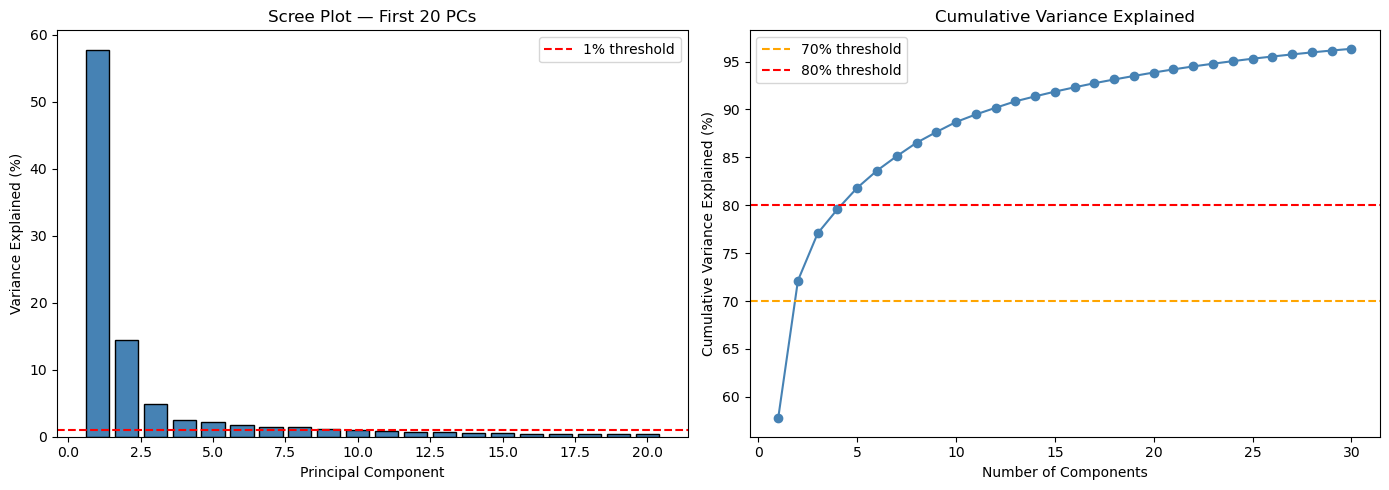

PC   Variance(%)   Cumulative(%)
PC 1      57.77         57.77
PC 2      14.38         72.14
PC 3       4.93         77.07
PC 4       2.52         79.59
PC 5       2.24         81.82
PC 6       1.79         83.62
PC 7       1.51         85.12
PC 8       1.40         86.52
PC 9       1.12         87.64
PC10       1.05         88.69
PC11       0.79         89.48
PC12       0.69         90.17
PC13       0.67         90.85
PC14       0.52         91.36
PC15       0.49         91.86
PC16       0.45         92.31
PC17       0.43         92.74
PC18       0.39         93.12
PC19       0.37         93.49
PC20       0.36         93.85


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ── Prep data ────────────────────────────────────────────────────────────────
# Standardize — important for PCA so high-volume words don't dominate
scaler = StandardScaler()
X = scaler.fit_transform(df_final)

# ── Run PCA ──────────────────────────────────────────────────────────────────
pca = PCA()
pca.fit(X)

# ── Scree plot ───────────────────────────────────────────────────────────────
explained = pca.explained_variance_ratio_ * 100
cumulative = np.cumsum(explained)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Individual variance explained
ax1.bar(range(1, 21), explained[:20], color='steelblue', edgecolor='black')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Variance Explained (%)')
ax1.set_title('Scree Plot — First 20 PCs')
ax1.axhline(y=1, color='red', linestyle='--', label='1% threshold')
ax1.legend()

# Cumulative variance explained
ax2.plot(range(1, 31), cumulative[:30], marker='o', color='steelblue')
ax2.axhline(y=70, color='orange', linestyle='--', label='70% threshold')
ax2.axhline(y=80, color='red', linestyle='--', label='80% threshold')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Variance Explained (%)')
ax2.set_title('Cumulative Variance Explained')
ax2.legend()

plt.tight_layout()
plt.show()

# ── Print variance table ─────────────────────────────────────────────────────
print("PC   Variance(%)   Cumulative(%)")
for i in range(20):
    print(f"PC{i+1:>2}   {explained[i]:>8.2f}      {cumulative[i]:>8.2f}")

In [34]:
# Top loadings for PC1 and PC2
loadings = pd.DataFrame(
    pca.components_.T,
    index=df_final.columns,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))]
)

print("Top 15 positive loadings — PC1:")
print(loadings['PC1'].sort_values(ascending=False).head(15))

print("\nTop 15 negative loadings — PC1:")
print(loadings['PC1'].sort_values().head(15))

print("\nTop 15 positive loadings — PC2:")
print(loadings['PC2'].sort_values(ascending=False).head(15))

Top 15 positive loadings — PC1:
keyword
copper             0.097238
construction       0.097211
aluminum           0.096746
oil                0.096585
manufacturing      0.096435
credit cards       0.095980
health services    0.095622
home care          0.095412
nickel             0.095410
titanium           0.095234
insurance          0.095171
carbon fiber       0.095136
steel              0.095110
clay               0.095108
oncology           0.094938
Name: PC1, dtype: float64

Top 15 negative loadings — PC1:
keyword
stimulus          -0.038871
dow jones         -0.023815
tesla stock       -0.020116
5g                -0.012807
tiktok            -0.010838
disney plus       -0.009996
black friday      -0.005119
cyber monday      -0.003315
cryptocurrency    -0.002739
stock market      -0.000000
vaccines           0.000969
paramount plus     0.005300
nvidia stock       0.005370
s&p 500            0.011541
walmart grocery    0.013472
Name: PC1, dtype: float64

Top 15 positive loadings —